In [1]:
import pandas as pd
from ptrail.core.TrajectoryDF import PTRAILDataFrame
from ptrail.preprocessing.filters import Filters as filters
from ptrail.features.kinematic_features import KinematicFeatures as spatial
from ptrail.preprocessing.interpolation import Interpolation
import ptrail.utilities.constants as const

# Reading the gulls dataset and converting to PTRAILDataFrame.
# Also, lets, print the first 5 points of the dataset to
# see how the dataframe looks.
gulls = pd.read_csv('./data/geolife_sample.csv')
gulls = PTRAILDataFrame(gulls,
                        latitude='lat',
                        longitude='lon',
                        datetime='datetime',
                        traj_id='id',
                        rest_of_columns=[])
gulls.head()

lat         lon
traj_id DateTime                                  
1       2008-10-23 05:53:11  39.984224  116.319402
        2008-10-23 05:53:16  39.984211  116.319389
        2008-10-23 05:53:21  39.984217  116.319422
        2008-10-23 05:53:23  39.984710  116.319865
        2008-10-23 05:53:28  39.984674  116.319810

In [2]:
new_df = spatial.create_distance_between_consecutive_column(gulls)

In [3]:
# filt_df = filters.hampel_outlier_detection(dataframe=new_df,
#                                            column_name='Distance_prev_to_curr')

In [4]:
# print(f"Length of original DF: {len(gulls)}")
# print(f"Length of Filtered DF: {len(filt_df)}")
# filt_df.head()

In [5]:
# filt_df = filt_df.drop(columns='Distance_prev_to_curr')
#
small_gulls = gulls.reset_index().loc[gulls.reset_index()['traj_id'] == '5'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]


In [6]:
interpolated_df = Interpolation.interpolate_position(dataframe=small_gulls,
                                                     time_jump=5,
                                                     ip_type='cubic')

In [7]:
print(f"Length of Original DF: {len(small_gulls)}")
print(f"Length of interpolated DF: {len(interpolated_df)}")
interpolated_df.head()

Length of Original DF: 109046
Length of interpolated DF: 110575


lat         lon
traj_id DateTime                                  
5       2008-10-24 04:12:30  40.004155  116.321337
        2008-10-24 04:12:35  40.003834  116.321462
        2008-10-24 04:12:40  40.003783  116.321431
        2008-10-24 04:12:45  40.003690  116.321429
        2008-10-24 04:12:50  40.003589  116.321427

In [8]:
feature_gen = spatial.create_acceleration_from_prev_column(dataframe=gulls)

feature_gen.head()

lat         lon  Distance_prev_to_curr  \
traj_id DateTime                                                            
1       2008-10-23 05:53:11  39.984224  116.319402                    NaN   
        2008-10-23 05:53:16  39.984211  116.319389               1.821083   
        2008-10-23 05:53:21  39.984217  116.319422               2.889671   
        2008-10-23 05:53:23  39.984710  116.319865              66.555997   
        2008-10-23 05:53:28  39.984674  116.319810               6.162987   

                             Speed_prev_to_curr  Acceleration_prev_to_curr  
traj_id DateTime                                                            
1       2008-10-23 05:53:11                 NaN                        NaN  
        2008-10-23 05:53:16            0.364217                        NaN  
        2008-10-23 05:53:21            0.577934                   0.042744  
        2008-10-23 05:53:23           33.277998                  16.350032  
        2008-10-23 05:53:28            1.232597                  -6.409080

In [9]:
feature_gen.to_csv('./data/cleaned.csv')

In [10]:
import osmnx as ox

g = ox.graph_from_point(center_point=(47.575204812245865,
                                      -52.70290732383729),
                        dist=1000,
                        network_type='walk')
g.graph

{'created_date': '2021-08-23 14:24:38',
 'created_with': 'OSMnx 1.1.1',
 'crs': 'epsg:4326',
 'simplified': True}

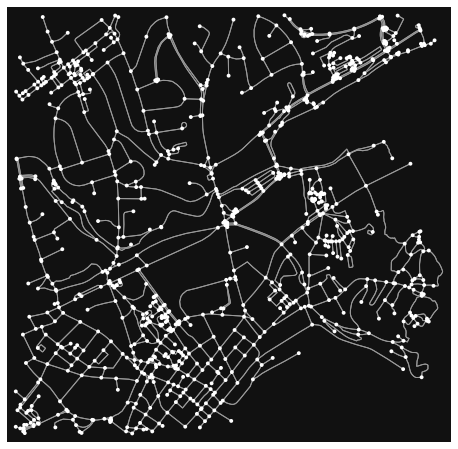

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [11]:
ox.plot_graph(g)